In [1]:
from patsy import bs, dmatrix
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import graphics
from scipy.integrate import quad
from scipy.interpolate import make_interp_spline

In [2]:
x = np.linspace(0,1,1000)
y = x * np.sin(20*x)
y_noise = x * np.sin(20*x) + np.random.randn(1000)*0.5
knots1 = np.arange(1, 8) / 8
knots2 = np.arange(1, 16) / 16
knots3 = np.arange(1, 64) / 64

In [3]:
w = np.linspace(0, 1, 2000)

In [4]:
bx1 = bs(x=x, knots=knots1, lower_bound=0,
         upper_bound=1, include_intercept=True,
         degree=3)

bx2 = bs(x=x, knots=knots2, lower_bound=0,
         upper_bound=1, include_intercept=True,
         degree=3)

bx3 = bs(x=x, knots=knots3, lower_bound=0,
         upper_bound=1, include_intercept=True,
         degree=3)

In [5]:
print(bx1.shape, bx2.shape)

(1000, 11) (1000, 19)


In [6]:
mod1 = sm.OLS(y, bx1)
res1 = mod1.fit()
# print(res1.summary())
# res1.params

mod2 = sm.OLS(y, bx2)
res2 = mod2.fit()
# print(res2.summary())
# res2.params

mod3 = sm.OLS(y_noise, bx1)
res3 = mod3.fit()
# res3.summary()
# res3.params

mod4 = sm.OLS(y_noise, bx2)
res4 = mod4.fit()
# res4.summary()
# res4.params

mod5 = sm.OLS(y_noise, bx3)
res5 = mod5.fit()

In [33]:
print(mod2.df_model, mod2.df_resid)

18.0 981.0


In [29]:
print(res2.mse_resid, res2.ssr)
# print(res2.mse_total)
# print(res2.mse_model)

2.601773934508294e-06 0.0025523402297526364


In [28]:
MSE2 = (1-res2.rsquared) * np.sum((y - np.mean(y))**2) / 981
print(MSE2)
RSS2 = (1-res2.rsquared) * np.sum((y - np.mean(y))**2) / 1000
print(RSS2)

2.60177393450444e-06
2.5523402297488557e-06


In [11]:
def fhat(w, knotlist, y, bx_):
    bx = bs(x=w, knots=knotlist, degree=3,
            lower_bound=0, upper_bound=1,
            include_intercept=True)
        
    coef = sm.OLS(y, bx_).fit().params.reshape((-1, 1))
    ans = bx @ coef
    ans = ans.flatten()
    return ans


def f(w):
    return w * np.sin(20*w)

def f_noise(w):
    return w * np.sin(20*w) + np.ramdom.randn()

In [12]:
test1 = fhat(w, knots1, y, bx1)
test2 = fhat(w, knots2, y, bx2)
test3 = fhat(w, knots1, y_noise, bx1)
test4 = fhat(w, knots2, y_noise, bx2)
test5 = fhat(w, knots3, y_noise, bx3)

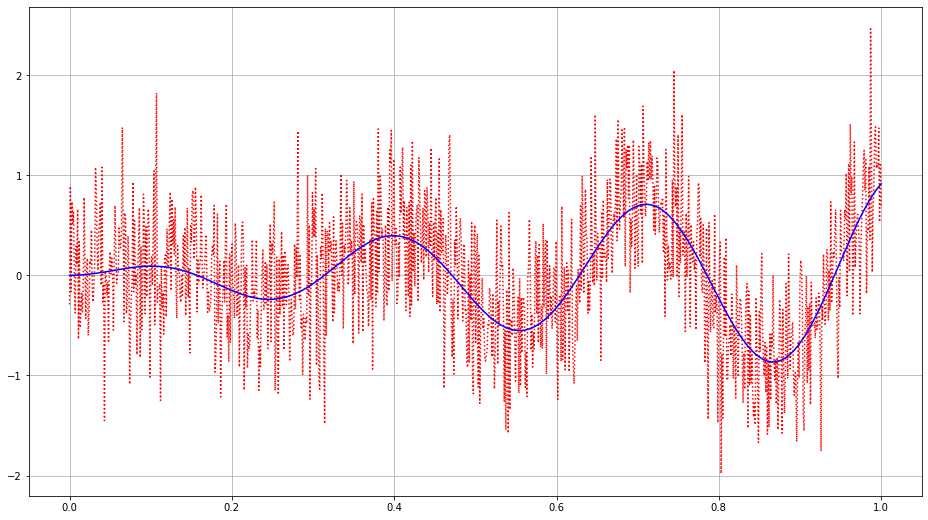

In [13]:
plt.figure(figsize=(16,9))
plt.plot(x, y_noise, "r:",
         x, y, "b-")
plt.grid()
plt.show()

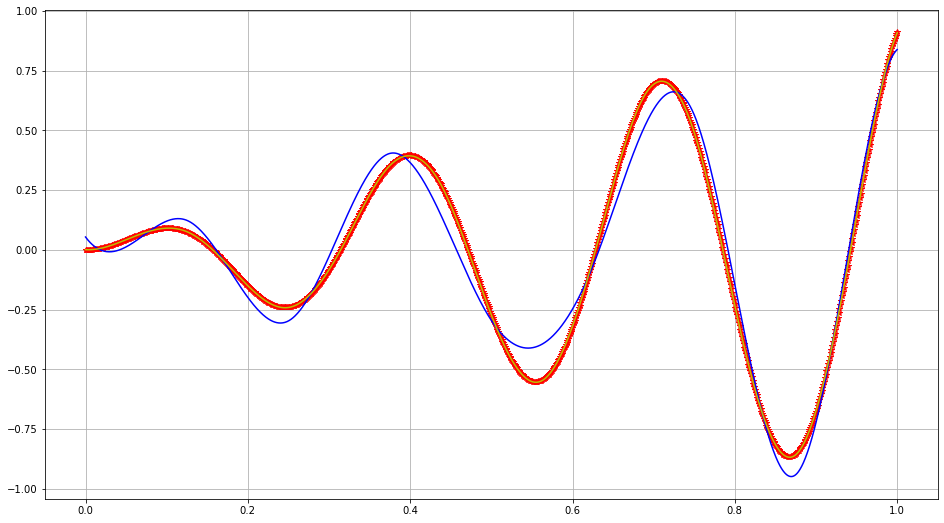

In [14]:
plt.figure(figsize=(16,9))
plt.plot(x, y, "r-*",
         w, test1, "b-",
         w, test2, "y-")
plt.grid()
plt.show()

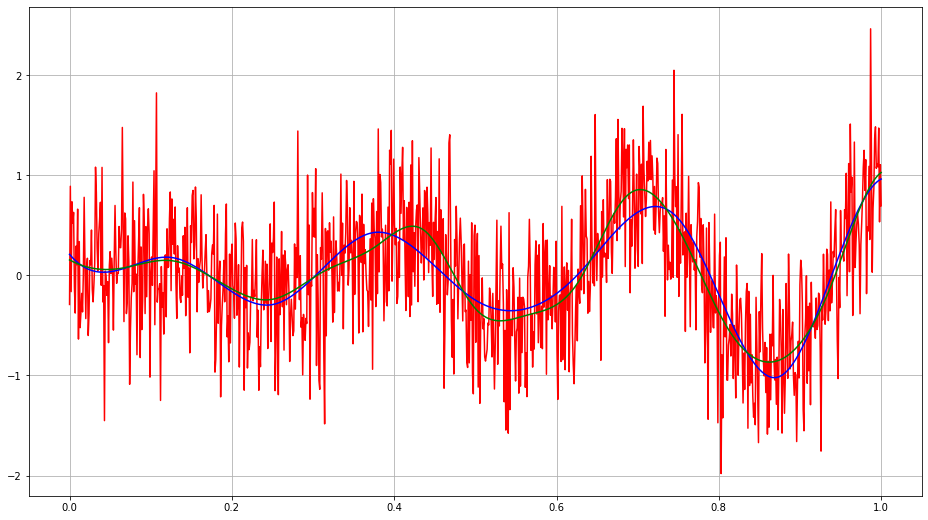

In [15]:
plt.figure(figsize=(16,9))
plt.plot(x, y_noise, "r-",
         w, test3, "b-",
         w, test4, "g-")
plt.grid()
plt.show()

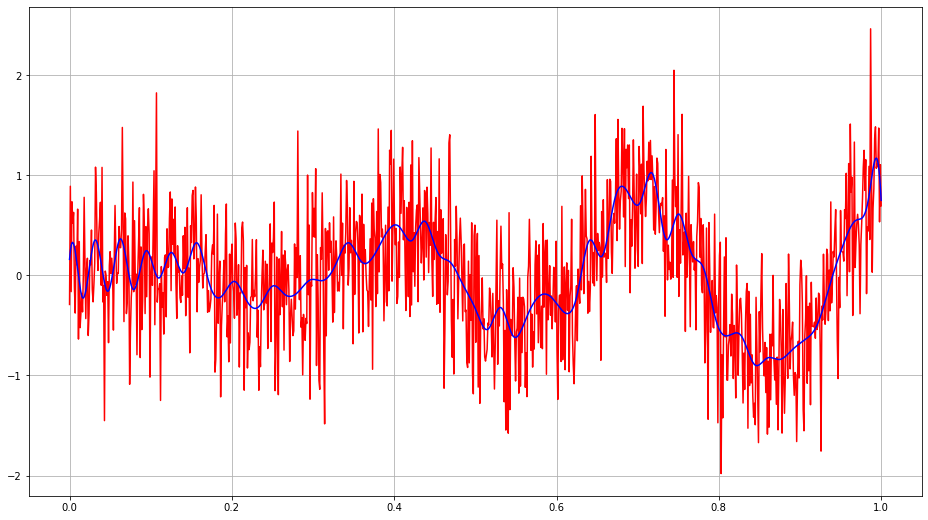

In [16]:
plt.figure(figsize=(16,9))
plt.plot(x, y_noise, "r-",
         w, test5, "b-")
plt.grid()
plt.show()

In [17]:
def ISE1(w):
    return (fhat(w, knots1, y, bx1) - f(w))**2

def ISE2(w):
    return (fhat(w, knots2, y, bx2) - f(w))**2

def ISE3(w):
    return (fhat(w, knots1, y_noise, bx1) - f(w))**2

def ISE4(w):
    return (fhat(w, knots2, y_noise, bx2) - f(w))**2

def ISE5(w):
    return (fhat(w, knots3, y_noise, bx3) - f(w))**2


In [18]:
integral_func1, _ = quad(ISE1, 0,1) 
integral_func2, _ = quad(ISE2, 0,1)
print(integral_func1)
print(integral_func2)

0.005355900537283611
2.547796571445916e-06


In [19]:
integral_func3, _ = quad(ISE3, 0,1)
integral_func4, _ = quad(ISE4, 0,1)
print(integral_func3)
print(integral_func4)

0.007840559210010778
0.005939639960104752


In [35]:
integral_func5, _ = quad(ISE5, 0,1, limit=100)
print(integral_func5)

0.018549133756828193
